# Read and concatenate xls data from PNBOIA

In [89]:
%matplotlib inline
import os
import xlrd
import numpy as np
from datetime import datetime
import datetime as dt
import consisteproc
import matplotlib.pylab as pl
import pandas as pd

In [56]:
boia = 'PNBOIA_FLN_201509.xls'
dmag = -23
pathname = os.environ['HOME'] + '/Dropbox/database/pnboia/marinha/' + boia

In [57]:
workbook = xlrd.open_workbook(pathname)

In [58]:
#seleciona planilha por indice (pode ser por nome tbm)
sheet_0 = workbook.sheet_by_index(0) #planilha 1 - status + vento
sheet_1 = workbook.sheet_by_index(1) #planilha 2 - meteo + onda

In [59]:
#pega os valores das celulas selecionadas
leg0 = np.array([[sheet_0.cell_value(r,c) for r in range(3,4)] for c in range(0,sheet_0.ncols)]).T
leg1 = np.array([[sheet_1.cell_value(r,c) for r in range(3,4)] for c in range(0,sheet_1.ncols)]).T

In [60]:
#dados - inverte - flipud
dd0 = np.flipud(np.array([[sheet_0.cell_value(r,c) for r in range(4,sheet_0.nrows)] for c in range(sheet_0.ncols)]).T)
dd1 = np.flipud(np.array([[sheet_1.cell_value(r,c) for r in range(4,sheet_1.nrows)] for c in range(sheet_1.ncols)]).T)

In [61]:
#substitui 'xxxx' por nan
dd0[np.where(dd0=='xxxx')] = np.nan
dd1[np.where(dd1=='xxxx')] = np.nan
dd0[np.where(dd0=='xxx')] = np.nan
dd1[np.where(dd1=='xxx')] = np.nan
dd0[np.where(dd0=='XXX')] = np.nan
dd1[np.where(dd1=='XXX')] = np.nan
dd0[np.where(dd0=='')] = np.nan
dd1[np.where(dd1=='')] = np.nan

In [62]:
#monta dataframe
df0 = pd.DataFrame(dd0[:,[1,3,5,6,7,8,9,10]],columns=['date','bat','ws1','wg1','wd1','ws2','wg2','wd2'])
df1 = pd.DataFrame(dd1[:,[1,2,3,4,5,6,7,8,9,10]],columns=['date','at','rh','dwp','pr','sst','hs','hmax','tp','dp'])

df0['date'] = pd.to_datetime(df0.date)
df1['date'] = pd.to_datetime(df1.date)

df0 = df0.set_index('date')
df1 = df1.set_index('date')

df0 = df0.astype(float)
df1 = df1.astype(float)

In [91]:
#corrige declinacao magnetica
df0[['wd1','wd2']] = df0[['wd1','wd2']] + dmag #corrige a declinacao magnetica para cada boia
df1['dp'] = df1['dp'] + dmag

In [81]:
#reamostra de hora em hora
df0 = df0.resample('H').mean()
df1 = df1.resample('H').mean()

In [92]:
#junta os dois dados
df = df1.join(df0)

In [83]:
# df.to_csv('out/jonas/' + boia + '_metocean.csv', na_rep='nan')

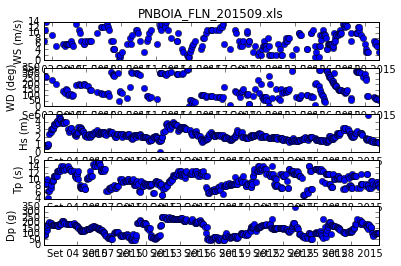

In [90]:
pl.figure()
pl.subplot(511)
pl.plot(df.index,df.ws1,'o')
pl.ylabel('WS (m/s)')
pl.title(boia)
pl.subplot(512)
pl.plot(df.index,df.wd1,'o')
pl.ylabel('WD (deg)')
pl.subplot(513)
pl.plot(df.index,df.hs,'o')
pl.ylabel('Hs (m)')
pl.subplot(514)
pl.plot(df.index,df.tp,'o')
pl.ylabel('Tp (s)')
pl.subplot(515)
pl.plot(df.index,df.dp,'o')
pl.ylabel('Dp (g)')
pl.show()